# Getting National CO2 data from the World-Bank

**UN Environment**

## Libraries 

In [1]:
import wbdata
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

## Selected Countries wit WB codes

In [2]:
WestAfrica_countries = {
    'BEN':'Benin',
    'BFA':'Burkina Faso',
    'GMB':'Gambia',
    'GHA':'Ghana',
    'GIN':'Guinea',
    'GNB':'Guinea-Bissau',
    'LBR':'Liberia',
    'MLI':'Mali',
    #'MRT':'Mauritania',
    'NER':'Niger',
    'NGA':'Nigeria',
    'SEN':'Senegal',
    'SLE':'Sierra Leone',
    'TGO':'Togo'
    #'':'Cape Verde','Ivory Coast',
    #'Saint Helena, Ascension and Tristan da Cunha',
}

In [3]:
SouthEAsia_countries = {
    #'BRN':'Brunei Darussalam',
    'KHM':'Cambodia',
    'TLS':'East Timor',
    'IDN':'Indonesia',
    #'Laos',
    'MYS':'Malaysia',
    'MMR':'Myanmar',
    'PHL':'Philippines',
    #'SGP':'Singapore',
    'THA':'Thailand',
    'VNM':'Vietnam',
}

## Selected Indicators

In [4]:
indicators = {'EN.ATM.CO2E.PC':'CO2 emissions (metric tons per capita)'}
indic_pop= {'SP.POP.TOTL':'Population'}

## Get data from WB

In [5]:
df = wbdata.get_dataframe(indicators, country=WestAfrica_countries.keys(), convert_date=True)
df_pop = wbdata.get_dataframe(indic_pop, country=WestAfrica_countries.keys(), convert_date=True)
dfu_wa = df.unstack(level=0)
dfu_pop_wa = df_pop.unstack(level=0)
dfu_wa.columns = dfu_wa.columns.droplevel(0)
dfu_pop_wa.columns = dfu_pop_wa.columns.droplevel(0)
wa_mean = pd.DataFrame({"Rolling mean":dfu_wa.mean(axis=1)}).rolling(10).mean()

In [6]:
dfu_wa.head()

country        Benin  Burkina Faso  Gambia, The     Ghana    Guinea  \
date                                                                  
1960-01-01  0.066354      0.009112     0.049833  0.219944  0.114805   
1961-01-01  0.052049      0.018730     0.058401  0.195992  0.169542   
1962-01-01  0.054209      0.017003     0.066929  0.202358  0.178846   
1963-01-01  0.047589      0.017504     0.075400  0.235984  0.185819   
1964-01-01  0.055304      0.021575     0.074352  0.219631  0.183751   

country     Guinea-Bissau   Liberia      Mali     Niger   Nigeria   Senegal  \
date                                                                          
1960-01-01       0.029745  0.147294  0.022990  0.008657  0.075472  0.258437   
1961-01-01       0.047057  0.140917  0.022048  0.015777  0.089321  0.247041   
1962-01-01       0.064030  0.216170  0.025894  0.018396  0.088889  0.240362   
1963-01-01       0.074885  0.297186  0.032346  0.023825  0.111387  0.247504   
1964-01-01       0.091111  0.395350  0.031981  0.025073  0.148276  0.258102   

country     Sierra Leone      Togo  
date                                
1960-01-01      0.311289  0.041762  
1961-01-01      0.124374  0.057386  
1962-01-01      0.138113  0.054570  
1963-01-01      0.154422  0.065171  
1964-01-01      0.124984  0.079426

In [7]:
df = wbdata.get_dataframe(indicators, country=SouthEAsia_countries.keys(), convert_date=True)
dfu_sea = df.unstack(level=0)
dfu_sea.columns = dfu_sea.columns.droplevel(0)
sea_mean = pd.DataFrame({"Rolling mean":dfu_sea.mean(axis=1)}).rolling(10).mean()

## Plot current CO2 emmisions

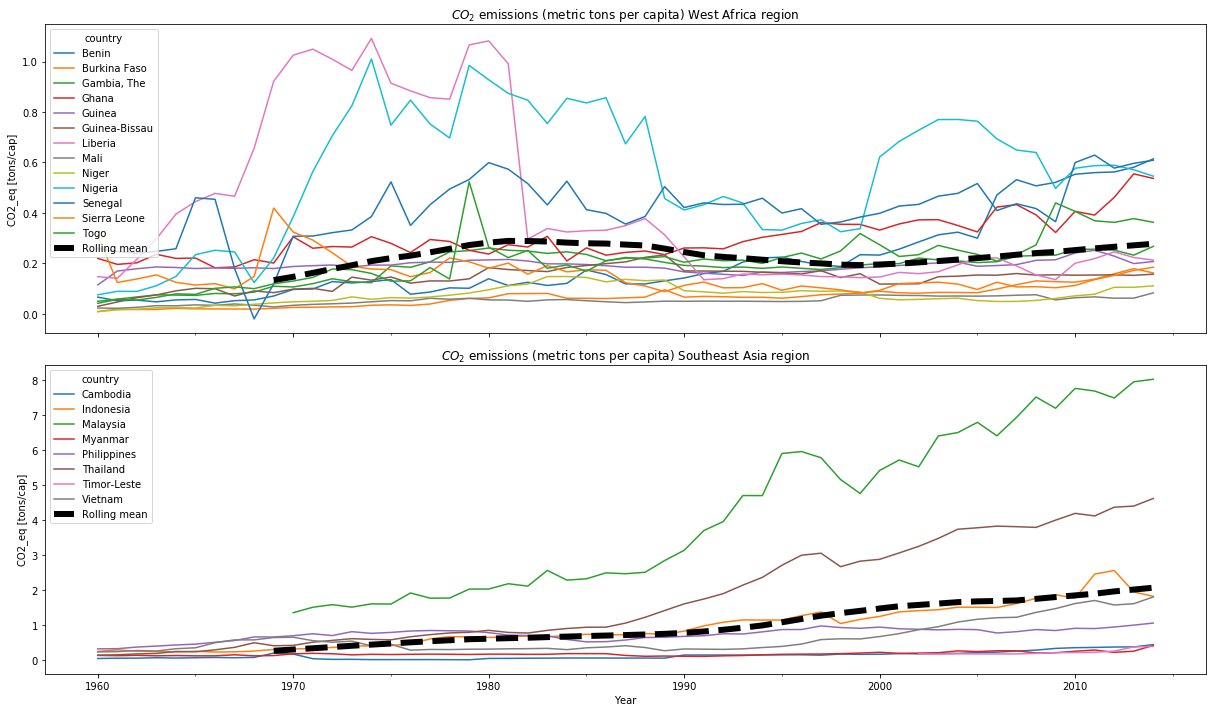

In [8]:
fix, (ax1, ax2) = plt.subplots(2,1, figsize=(17,10), sharex=True)
dfu_wa.plot(ax=ax1);
wa_mean.plot(ax=ax1, style='k--', linewidth=6);
ax1.set_ylabel('CO2_eq [tons/cap]');
ax1.set_title('$CO_2$ emissions (metric tons per capita) West Africa region'); 
dfu_sea.plot(ax=ax2);
sea_mean.plot(ax=ax2, style='k--', linewidth=6);
ax2.set_xlabel('Year');
ax2.set_ylabel('CO2_eq [tons/cap]');
ax2.set_title('$CO_2$ emissions (metric tons per capita) Southeast Asia region');
plt.tight_layout()
plt.savefig('FIGURES/co2_emmisions.png', dpi=300)

## Plot Rolling mean emissions for each region

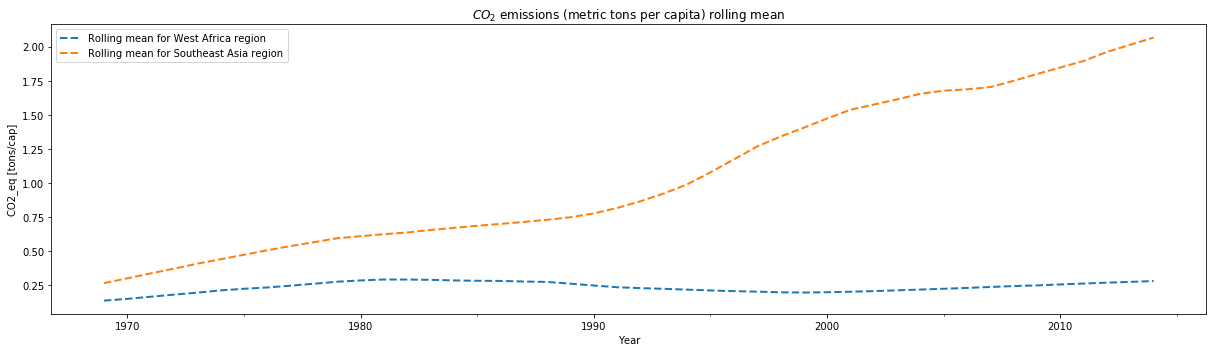

In [9]:
fix, ax1 = plt.subplots(figsize=(17,5))
wa_mean.join(
    sea_mean,
    lsuffix=' for West Africa region',
    rsuffix=' for Southeast Asia region').dropna().plot(
        ax=ax1,style='--', linewidth=2);
ax1.set_ylabel('CO2_eq [tons/cap]');
ax1.set_title('$CO_2$ emissions (metric tons per capita) rolling mean');
ax1.set_xlabel('Year');
plt.tight_layout()
plt.savefig('FIGURES/co2_emmisions_rolling_mean.png', dpi=300)

## Compute growth rates of regions

In [10]:
Y = '{}-01-01'
Y_i = '1974'
Y_o = '2014'
Y_delta = int(Y_o) - int(Y_i) 
growth_rate_sea = (sea_mean.loc[Y.format(Y_o)] / sea_mean.loc[Y.format(Y_i)]) ** (1/Y_delta)
growth_rate_wa = (wa_mean.loc[Y.format(Y_o)] / wa_mean.loc[Y.format(Y_i)]) ** (1/Y_delta)

In [11]:
wa_mean.loc[datetime(int(Y_o), 1, 1), 'sea'] = wa_mean.loc[datetime(int(Y_o), 1, 1), 'Rolling mean']
wa_mean.loc[datetime(int(Y_o), 1, 1), 'wa'] = wa_mean.loc[datetime(int(Y_o), 1, 1), 'Rolling mean']
for year in range(int(Y_o)+1, int(Y_o)+1 + Y_delta):
    wa_mean.loc[datetime(year, 1, 1), 'sea'] = (wa_mean.loc[Y.format(year-1), 'sea'] * growth_rate_sea)[0]
    wa_mean.loc[datetime(year, 1, 1), 'wa'] = (wa_mean.loc[Y.format(year-1), 'wa'] * growth_rate_wa)[0]

## Plot projected per capita emissions

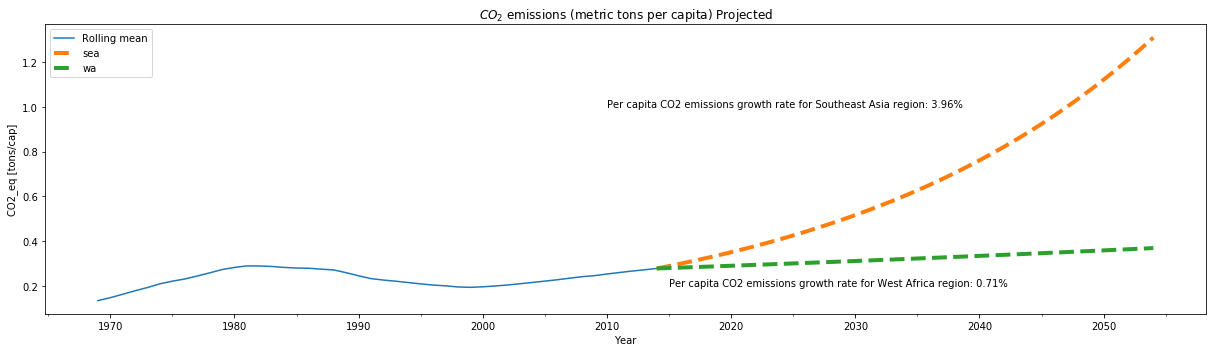

In [12]:
fix, ax1 = plt.subplots(figsize=(17,5))
wa_mean.plot(ax=ax1);
ax1.set_ylabel('CO2_eq [tons/cap]');
ax1.set_title('$CO_2$ emissions (metric tons per capita) Projected');
ax1.set_xlabel('Year');
msg = "Per capita CO2 emissions growth rate for {0:s} region: {1:0.2f}%"
ax1.text(datetime(2015,1,1), 0.2, msg.format('West Africa', (growth_rate_wa - 1)[0]*100) );
ax1.text(datetime(2010,1,1), 1, msg.format('Southeast Asia', (growth_rate_sea - 1)[0]*100) );
l = ax1.lines[1]
m = ax1.lines[2]
l.set_linestyle('--')
m.set_linestyle('--')
plt.setp(l, linewidth=4)
plt.setp(m, linewidth=4);
ax1.legend();
plt.tight_layout()
plt.savefig('FIGURES/co2_emmisions_projections.png', dpi=300)

In [13]:
pd.DataFrame(wa_mean.loc['2050-1-1', ['sea', 'wa']])

2050-01-01
sea    1.122023
wa     0.358497

## Compute and plot projected per capita emissions for each country

In [14]:
for year in range(int(Y_o)+1, int(Y_o)+1 + Y_delta):
    dfu_wa.loc[datetime(year, 1, 1), :] = dfu_wa.loc[Y.format(year-1), :] * growth_rate_sea[0]

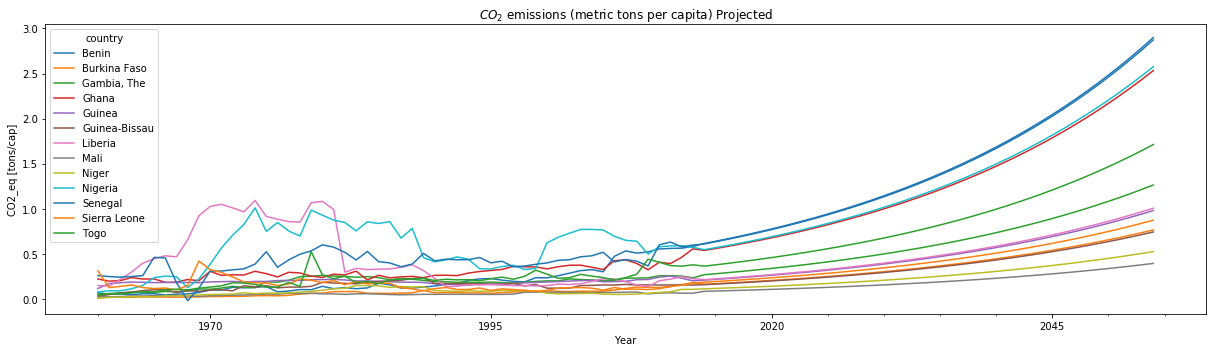

In [15]:
fix, ax1 = plt.subplots(figsize=(17,5))
dfu_wa.plot(ax=ax1)
ax1.set_ylabel('CO2_eq [tons/cap]');
ax1.set_title('$CO_2$ emissions (metric tons per capita) Projected');
ax1.set_xlabel('Year');
plt.tight_layout()
plt.savefig('FIGURES/co2_emmisions_cap_projections_countries.png', dpi=300)

## Compute and plot projected population

In [16]:
Y_i = dfu_pop_wa.index[0]
Y_o = dfu_pop_wa.index[-1]
Y_delta = dfu_pop_wa.index[-1] - dfu_pop_wa.index[0]
Y_delta = int(Y_delta.days / 365.25)
growth_rate = (dfu_pop_wa.loc[Y_o].squeeze().div(dfu_pop_wa.loc[Y_i, :].squeeze()) ) ** (1/Y_delta)

In [17]:
for year in range(Y_o.year+1, 2055):
    dfu_pop_wa.loc[datetime(year, 1, 1), :] = dfu_pop_wa.loc[Y.format(year-1), :] * growth_rate

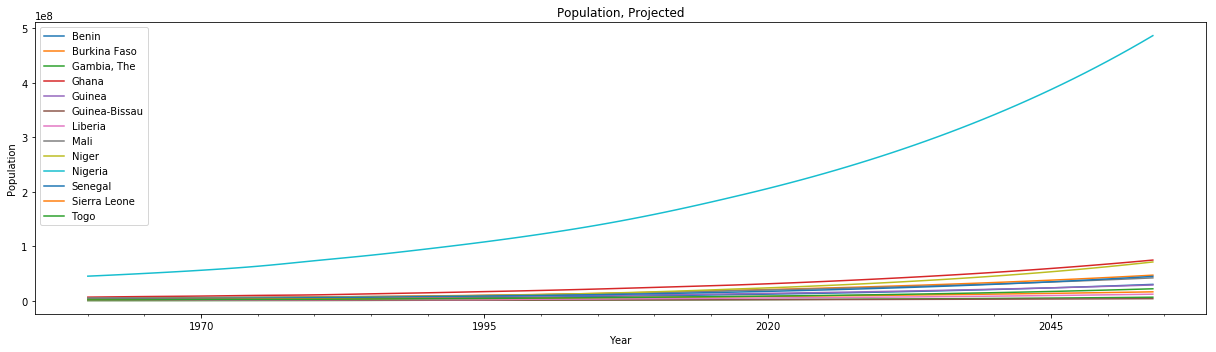

In [18]:
fix, ax1 = plt.subplots(figsize=(17,5))
dfu_pop_wa.plot(ax=ax1);
ax1.legend(loc=2);
ax1.set_ylabel('Population');
ax1.set_title('Population, Projected');
ax1.set_xlabel('Year');
plt.tight_layout()
plt.savefig('FIGURES/population_projections_countries.png', dpi=300)

## Compute and plot projected total CO2 emissions

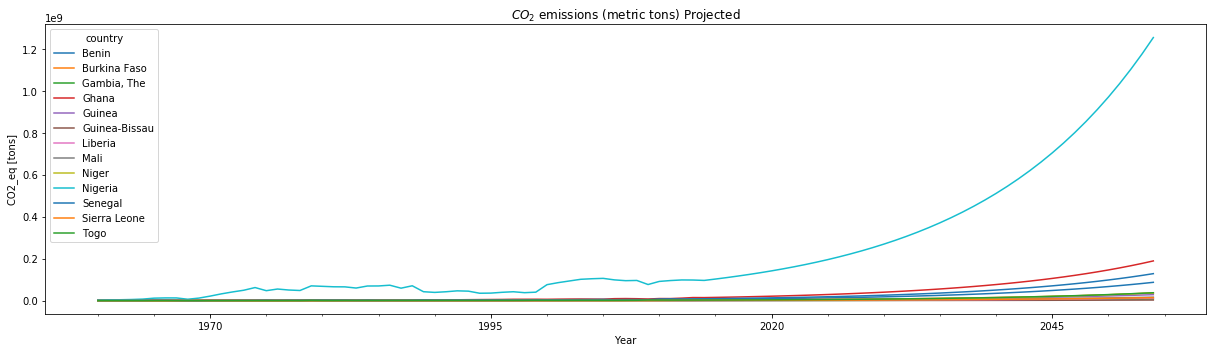

In [19]:
fix, ax1 = plt.subplots(figsize=(17,5))
dfu_pop_wa.mul(dfu_wa).plot(ax=ax1);
ax1.set_ylabel('CO2_eq [tons]');
ax1.set_title('$CO_2$ emissions (metric tons) Projected');
ax1.set_xlabel('Year');
plt.tight_layout()
plt.savefig('FIGURES/co2_emmisions_projections_countries.png', dpi=300)

In [20]:
dfu_pop_wa.to_excel('exported_data_wa.xlsx')

In [21]:
df = wbdata.get_dataframe({'EN.ATM.CO2E.KT':'CO2 emissions (kt)'}, country="WLD", data_date = datetime(2014, 1, 1))

In [22]:
print("This value represents {:0.2f}% of the global CO2 emissions in 2014".format(
    dfu_pop_wa.sum(axis=1).loc['2050-1-1'] / df.squeeze()))

This value represents 22.12% of the global CO2 emissions in 2014


In [23]:
dfu_pop_wa.sum(axis=1).loc['2050-1-1'] / 100

7993298.098194194